In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Data:**

In [3]:
asthma_data = pd.read_csv('/content/asthma_disease_data.csv')  # Adjust the path as needed

In [4]:
asthma_data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [5]:
asthma_data.shape

(2392, 29)

In [6]:
asthma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [15]:
asthma_data.columns = ['patient_id',
 'age',
 'gender',
 'ethnicity',
 'education_level',
 'bmi',
 'smoking',
 'physical_activity',
 'diet_quality',
 'sleep_quality',
 'pollution_exposure',
 'pollen_exposure',
 'dust_exposure',
 'pet_allergy',
 'family_history_asthma',
 'history_of_allergies',
 'eczema',
 'hay_fever',
 'gastroesophageal_reflux',
 'lung_function_fev1',
 'lung_function_fvc',
 'wheezing',
 'shortness_of_breath',
 'chest_tightness',
 'coughing',
 'nighttime_symptoms',
 'exercise_induced',
 'diagnosis',
 'doctor_in_charge']


In [16]:
asthma_data.head()

,patient_id,age,gender,ethnicity,education_level,bmi,smoking,physical_activity,diet_quality,sleep_quality,...,lung_function_fev1,lung_function_fvc,wheezing,shortness_of_breath,chest_tightness,coughing,nighttime_symptoms,exercise_induced,diagnosis,doctor_in_charge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


**Ensure Data Validity:**

In [17]:
missing_values = asthma_data.isnull().sum()
print(missing_values)

patient_id                 0
age                        0
gender                     0
ethnicity                  0
education_level            0
bmi                        0
smoking                    0
physical_activity          0
diet_quality               0
sleep_quality              0
pollution_exposure         0
pollen_exposure            0
dust_exposure              0
pet_allergy                0
family_history_asthma      0
history_of_allergies       0
eczema                     0
hay_fever                  0
gastroesophageal_reflux    0
lung_function_fev1         0
lung_function_fvc          0
wheezing                   0
shortness_of_breath        0
chest_tightness            0
coughing                   0
nighttime_symptoms         0
exercise_induced           0
diagnosis                  0
doctor_in_charge           0
dtype: int64


In [18]:
duplicates = asthma_data.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [19]:
asthma_data.dtypes

,0
patient_id,int64
age,int64
gender,int64
ethnicity,int64
education_level,int64
bmi,float64
smoking,int64
physical_activity,float64
diet_quality,float64
sleep_quality,float64


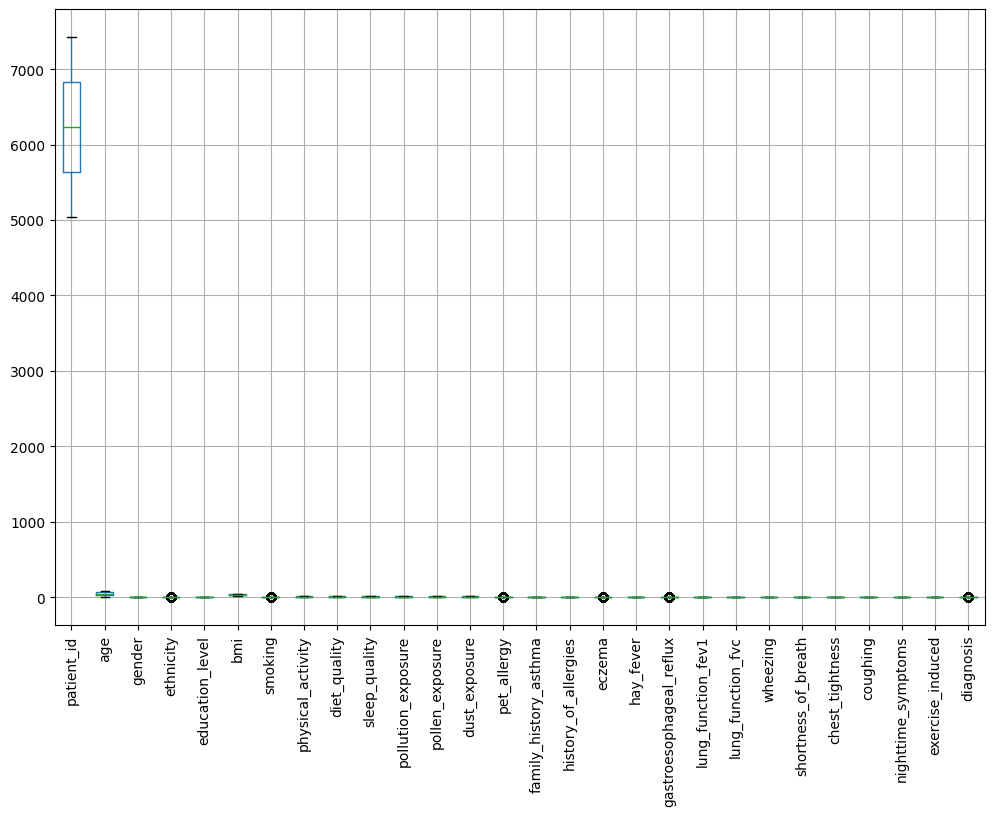

In [22]:
asthma_data.boxplot(figsize=(12, 8))
plt.xticks(rotation=90)
plt.show()

**Perform Exploratory Data Analysis (EDA):**

In [23]:
asthma_data.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,2392.0,6229.500000,690.655244,5034.000000,5631.750000,6229.500000,6827.250000,7425.000000
age,2392.0,42.137960,21.606655,5.000000,23.000000,42.000000,61.000000,79.000000
gender,2392.0,0.493311,0.500060,0.000000,0.000000,0.000000,1.000000,1.000000
ethnicity,2392.0,0.669732,0.986120,0.000000,0.000000,0.000000,1.000000,3.000000
education_level,2392.0,1.307274,0.898242,0.000000,1.000000,1.000000,2.000000,3.000000
bmi,2392.0,27.244877,7.201628,15.031803,20.968313,27.052202,33.555903,39.985611
smoking,2392.0,0.141722,0.348838,0.000000,0.000000,0.000000,0.000000,1.000000
physical_activity,2392.0,5.051786,2.903574,0.001740,2.578333,5.016881,7.540234,9.995809
diet_quality,2392.0,5.022867,2.909980,0.003031,2.432043,5.115383,7.544216,9.999904
sleep_quality,2392.0,7.019012,1.732475,4.001437,5.498500,6.975839,8.526950,9.996235


In [28]:
asthma_data.age.value_counts()


,count
age,
51,47
12,45
27,43
57,42
22,40
...,...
52,24
68,23
30,23


In [29]:
asthma_data.gender.value_counts()

,count
gender,
0,1212
1,1180


In [31]:
asthma_data.gender = asthma_data.gender.astype('category')

In [32]:
asthma_data.ethnicity.value_counts()

,count
ethnicity,
0,1465
1,475
2,229
3,223


In [33]:
asthma_data.ethnicity = asthma_data.ethnicity.astype('category')

In [34]:
asthma_data.education_level.value_counts()

,count
education_level,
1,933
2,749
0,478
3,232


In [35]:
asthma_data.education_level = asthma_data.education_level.astype('category')

In [81]:
asthma_data.bmi.value_counts()

,count
bmi,
15.848744,1
33.049449,1
37.458931,1
34.743797,1
29.095900,1
...,...
15.420466,1
22.600303,1
24.735924,1


In [82]:
asthma_data.bmi = asthma_data.bmi.astype('float')

In [36]:
asthma_data.smoking.value_counts()

,count
smoking,
0,2053
1,339


In [37]:
asthma_data.smoking = asthma_data.smoking.astype('category')

In [39]:
asthma_data.physical_activity.value_counts()

,count
physical_activity,
0.894448,1
6.623081,1
6.875519,1
2.200373,1
5.837363,1
...,...
6.110344,1
2.452471,1
8.869639,1


In [40]:
asthma_data.physical_activity = asthma_data.physical_activity.astype('float')

In [41]:
asthma_data.diet_quality.value_counts()

,count
diet_quality,
5.488696,1
6.205457,1
6.572507,1
5.237142,1
0.702779,1
...,...
3.843585,1
8.380381,1
6.800111,1


In [42]:
asthma_data.diet_quality = asthma_data.diet_quality.astype('float')

In [43]:
asthma_data.sleep_quality.value_counts()

,count
sleep_quality,
8.701003,1
5.812183,1
6.988044,1
8.735889,1
5.160771,1
...,...
5.110326,1
8.226364,1
4.565343,1


In [44]:
asthma_data.sleep_quality = asthma_data.sleep_quality.astype('float')

In [45]:
asthma_data.pollution_exposure.value_counts()

,count
pollution_exposure,
7.388481,1
0.541376,1
6.425171,1
9.375135,1
9.879160,1
...,...
6.727460,1
0.310135,1
9.075495,1


In [46]:
asthma_data.pollution_exposure = asthma_data.pollution_exposure.astype('float')

In [47]:
asthma_data.pollen_exposure.value_counts()

,count
pollen_exposure,
2.855578,1
2.530565,1
3.069180,1
4.351715,1
8.660118,1
...,...
7.245994,1
3.205765,1
8.912371,1


In [48]:
asthma_data.pollen_exposure = asthma_data.pollen_exposure.astype('float')

In [49]:
asthma_data.dust_exposure.value_counts()

,count
dust_exposure,
0.974339,1
3.606962,1
7.882002,1
9.784246,1
1.396304,1
...,...
8.778089,1
3.001901,1
0.091395,1


In [50]:
asthma_data.dust_exposure = asthma_data.dust_exposure.astype('float')

In [51]:
asthma_data.pet_allergy.value_counts()

,count
pet_allergy,
0,1995
1,397


In [52]:
asthma_data.pet_allergy = asthma_data.pet_allergy.astype('category')

In [53]:
asthma_data.family_history_asthma.value_counts()

,count
family_history_asthma,
0,1672
1,720


In [54]:
asthma_data.family_history_asthma = asthma_data.family_history_asthma.astype('category')

In [55]:
asthma_data.history_of_allergies.value_counts()

,count
history_of_allergies,
0,1437
1,955


In [56]:
asthma_data.history_of_allergies = asthma_data.history_of_allergies.astype('category')

In [57]:
asthma_data.eczema.value_counts()

,count
eczema,
0,1933
1,459


In [58]:
asthma_data.eczema = asthma_data.eczema.astype('category')

In [59]:
asthma_data.hay_fever.value_counts()

,count
hay_fever,
0,1786
1,606


In [60]:
asthma_data.hay_fever = asthma_data.hay_fever.astype('category')

In [61]:
asthma_data.gastroesophageal_reflux.value_counts()

,count
gastroesophageal_reflux,
0,2014
1,378


In [62]:
asthma_data.gastroesophageal_reflux = asthma_data.gastroesophageal_reflux.astype('category')

In [63]:
asthma_data.lung_function_fev1.value_counts()

,count
lung_function_fev1,
1.369051,1
2.587923,1
1.486454,1
2.965796,1
1.576001,1
...,...
3.999608,1
1.045374,1
2.116730,1


In [64]:
asthma_data.lung_function_fev1 = asthma_data.lung_function_fev1.astype('float')

In [65]:
asthma_data.lung_function_fvc.value_counts()

,count
lung_function_fvc,
4.941206,1
5.230254,1
1.835264,1
2.758789,1
3.372656,1
...,...
4.385549,1
3.999870,1
4.156810,1


In [66]:
asthma_data.lung_function_fvc = asthma_data.lung_function_fvc.astype('float')

In [67]:
asthma_data.wheezing.value_counts()

,count
wheezing,
1,1426
0,966


In [68]:
asthma_data.wheezing = asthma_data.wheezing.astype('category')

In [69]:
asthma_data.shortness_of_breath.value_counts()

,count
shortness_of_breath,
1,1197
0,1195


In [70]:
asthma_data.shortness_of_breath = asthma_data.shortness_of_breath.astype('category')

In [71]:
asthma_data.chest_tightness.value_counts()

,count
chest_tightness,
1,1204
0,1188


In [72]:
asthma_data.chest_tightness = asthma_data.chest_tightness.astype('category')

In [74]:
asthma_data.coughing.value_counts()

,count
coughing,
1,1204
0,1188


In [75]:
asthma_data.coughing = asthma_data.coughing.astype('category')

In [76]:
asthma_data.nighttime_symptoms.value_counts()

,count
nighttime_symptoms,
1,1441
0,951


In [77]:
asthma_data.nighttime_symptoms = asthma_data.nighttime_symptoms.astype('category')

In [78]:
asthma_data.exercise_induced.value_counts()

,count
exercise_induced,
1,1447
0,945


In [79]:
asthma_data.exercise_induced = asthma_data.exercise_induced.astype('category')

In [80]:
asthma_data.diagnosis.value_counts()

,count
diagnosis,
0,2268
1,124


In [83]:
asthma_data.dtypes

,0
patient_id,int64
age,int64
gender,category
ethnicity,category
education_level,category
bmi,float64
smoking,category
physical_activity,float64
diet_quality,float64
sleep_quality,float64


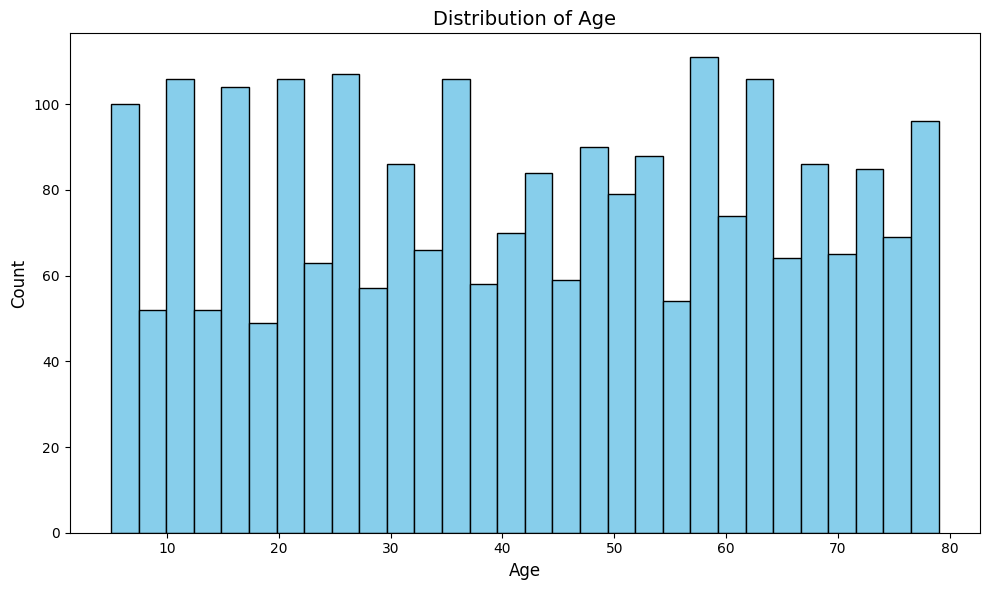

In [100]:
# Age distribution
plt.figure(figsize=(10, 6))
plt.hist(asthma_data['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

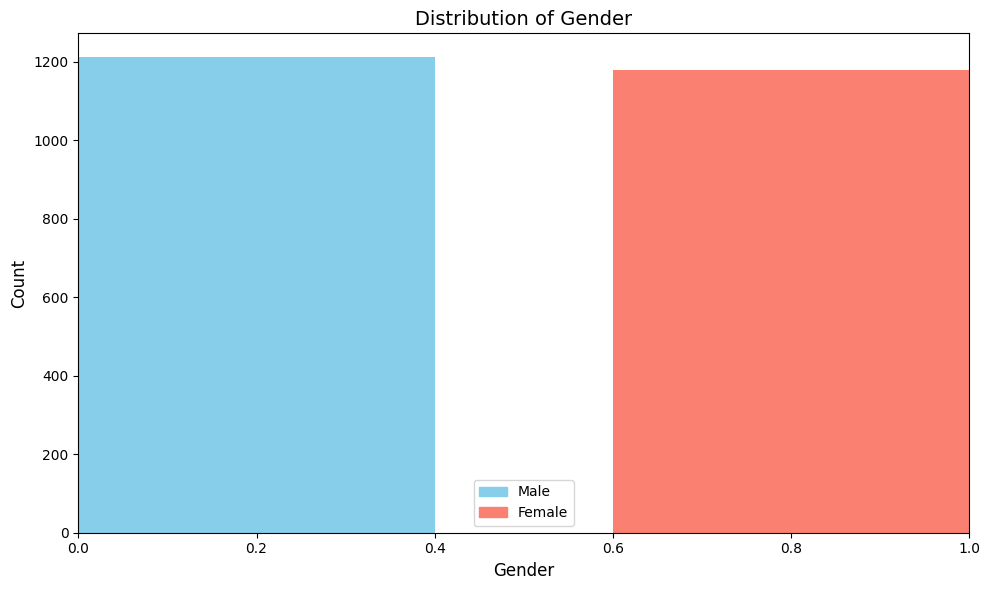

In [98]:
# Gender distribution

# Create a list of colors corresponding to each gender
colors = ['skyblue' if gender == 0 else 'salmon' for gender in asthma_data['gender'].index]

plt.figure(figsize=(10, 6))
plt.bar(asthma_data['gender'].value_counts().index, asthma_data['gender'].value_counts().values, color = colors)
plt.title('Distribution of Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.xlim(0, 1)
# Add a legend for the colors with appropriate labels
handles = [plt.Rectangle((0,0),1,1, color=c) for c in ['skyblue', 'salmon']]
plt.legend(handles, ['Male', 'Female'])
plt.tight_layout()
plt.show()

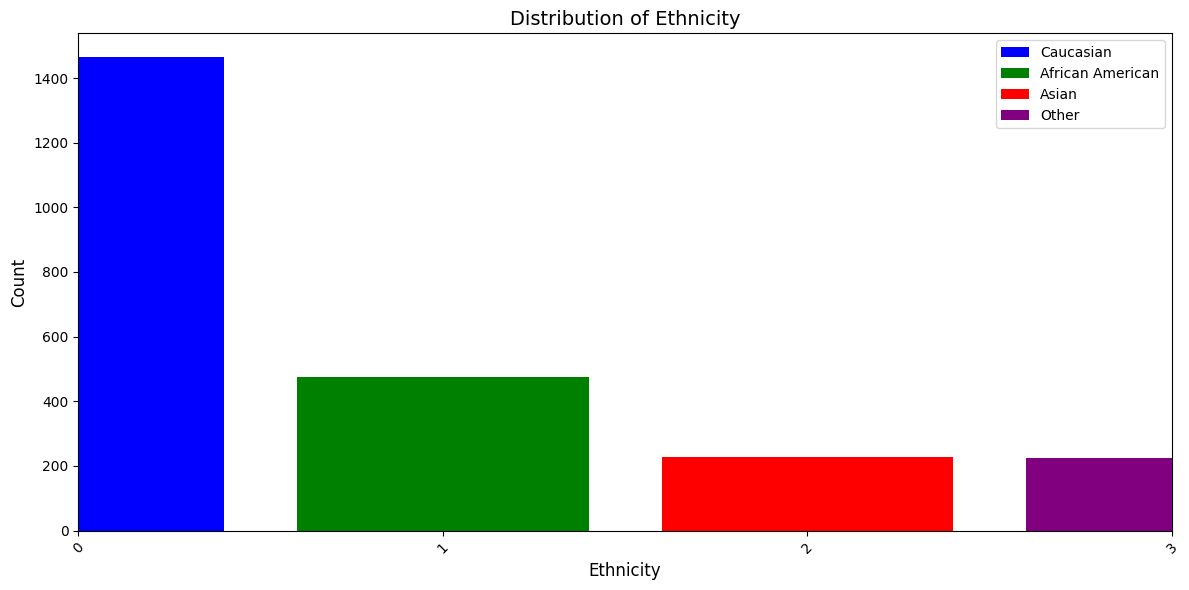

In [110]:
# Ethnicity distribution
plt.figure(figsize=(12, 6))
ethnicity_counts = asthma_data['ethnicity'].value_counts()
plt.bar(ethnicity_counts.index, ethnicity_counts.values, color=['blue', 'green', 'red', 'purple'],
               label=['Caucasian', 'African American', 'Asian', 'Other'])
plt.title('Distribution of Ethnicity', fontsize=14)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 4), rotation=45)
plt.xlim(0, 3)
plt.legend()
plt.tight_layout()
plt.show()


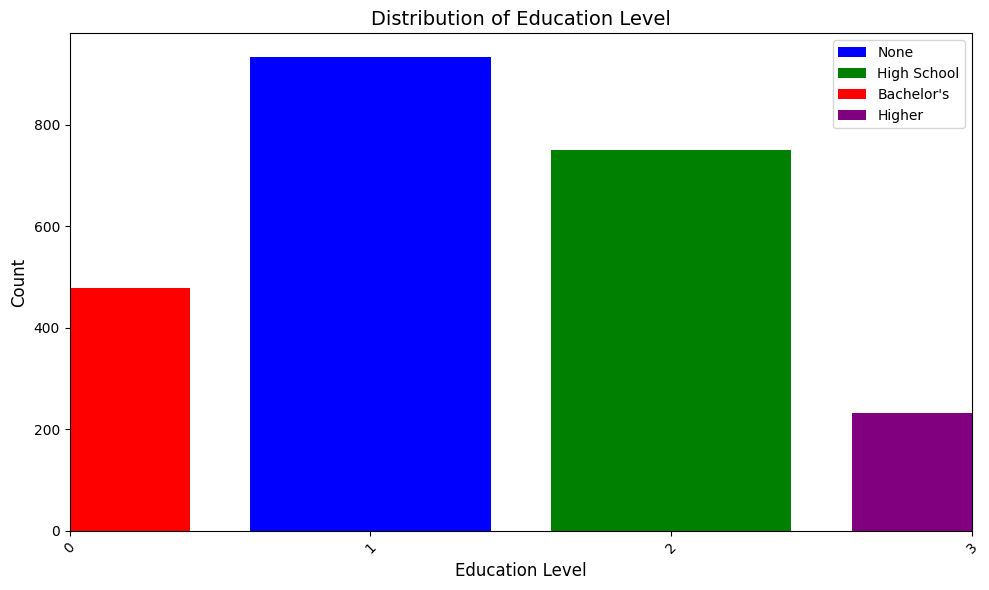

In [114]:
# Education Level distribution
plt.figure(figsize=(10, 6))
education_counts = asthma_data['education_level'].value_counts()
plt.bar(education_counts.index, education_counts.values, color=['blue', 'green', 'red', 'purple'],
               label=['None', 'High School', "Bachelor's", 'Higher'])
plt.title('Distribution of Education Level', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 4), rotation=45)
plt.xlim(0, 3)
plt.legend()
plt.tight_layout()
plt.show()

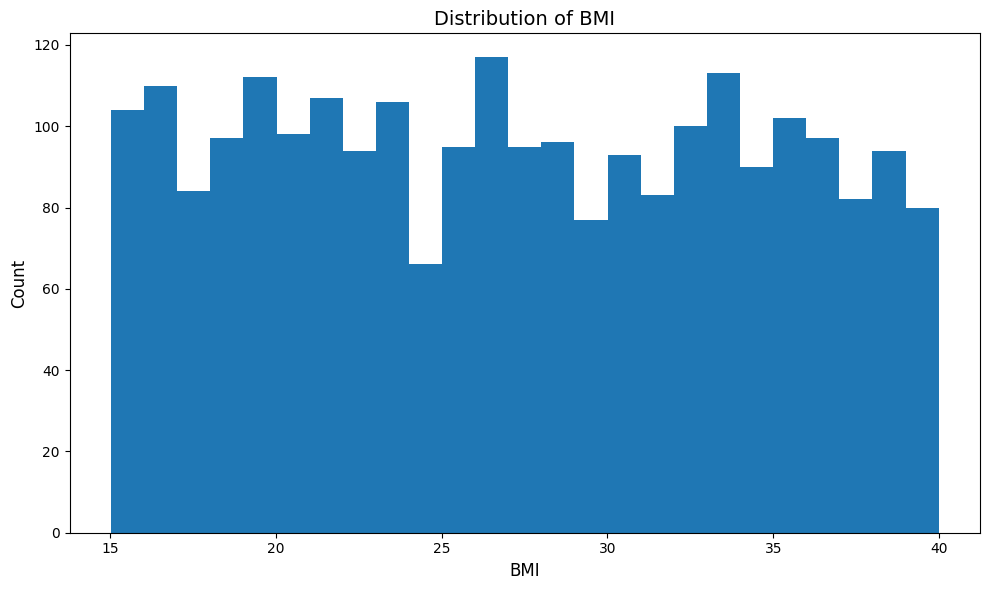

In [118]:
# BMI distribution
plt.figure(figsize=(10, 6))
plt.hist(asthma_data['bmi'], bins=25)
plt.title('Distribution of BMI', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


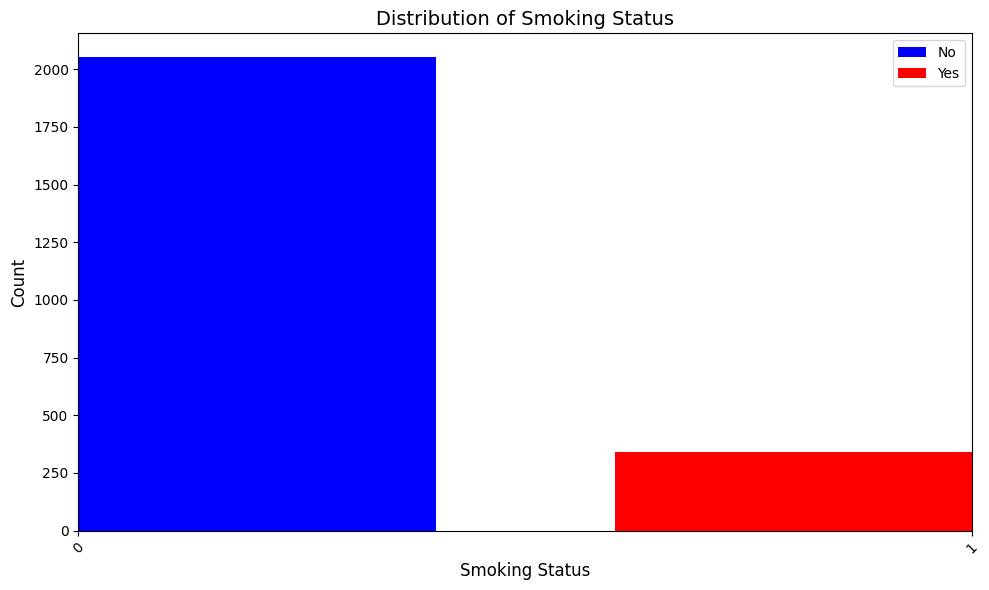

In [120]:
# Smoking Status distribution
plt.figure(figsize=(10, 6))
smoking_counts = asthma_data['smoking'].value_counts()
plt.bar(smoking_counts.index, smoking_counts.values, color=['blue', 'red'], label = ['No', 'Yes'])
plt.title('Distribution of Smoking Status', fontsize=14)
plt.xlabel('Smoking Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 2), rotation=45)
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

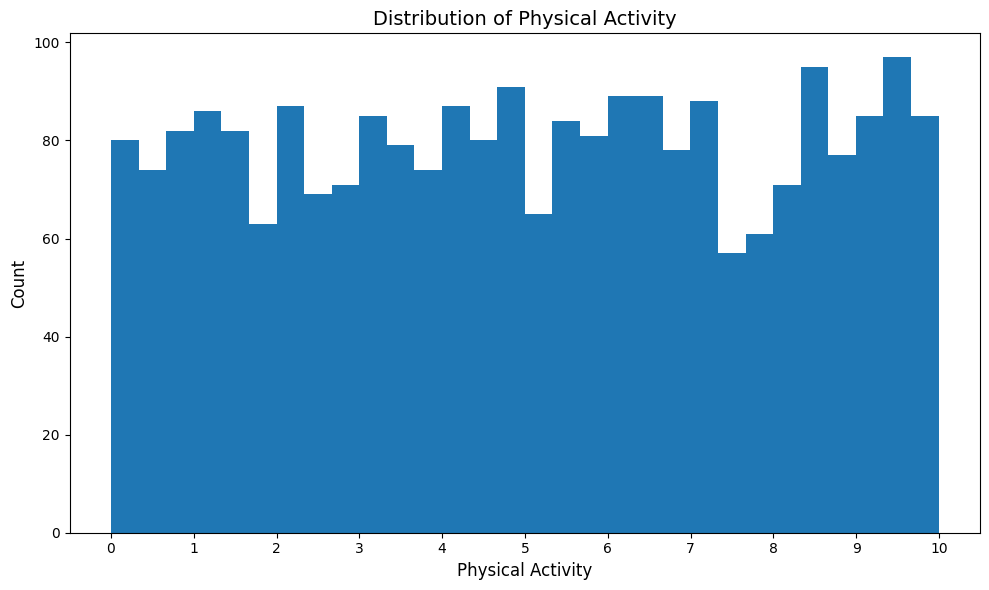

In [129]:
# Plot a histogram if the data appears continuous
plt.figure(figsize=(10, 6))
plt.hist(asthma_data['physical_activity'], bins=30)
plt.title('Distribution of Physical Activity', fontsize=14)
plt.xlabel('Physical Activity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 11))
plt.tight_layout()
plt.show()


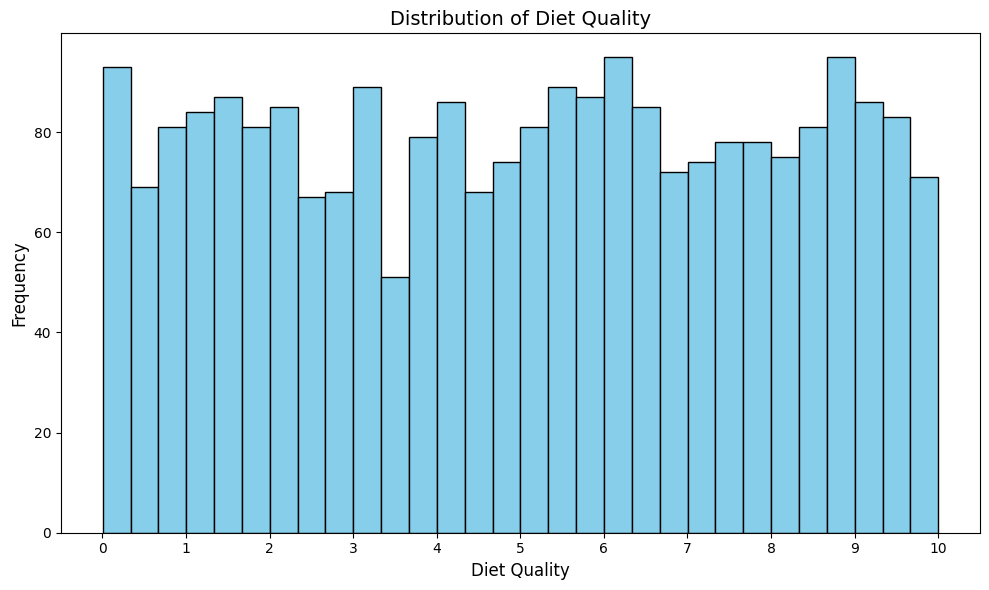

In [126]:
# Histogram for Diet Quality
plt.figure(figsize=(10, 6))
plt.hist(asthma_data['diet_quality'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Diet Quality', fontsize=14)
plt.xlabel('Diet Quality', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0, 11))
plt.tight_layout()
plt.show()


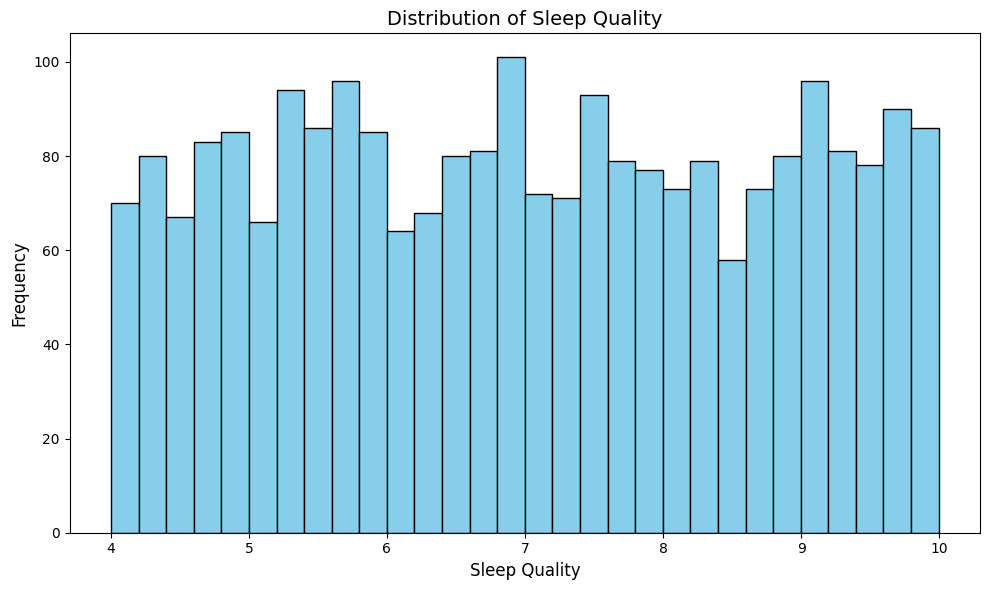

In [132]:
# Histogram for Sleep Quality
plt.figure(figsize=(10, 6))
plt.hist(asthma_data['sleep_quality'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sleep Quality', fontsize=14)
plt.xlabel('Sleep Quality', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

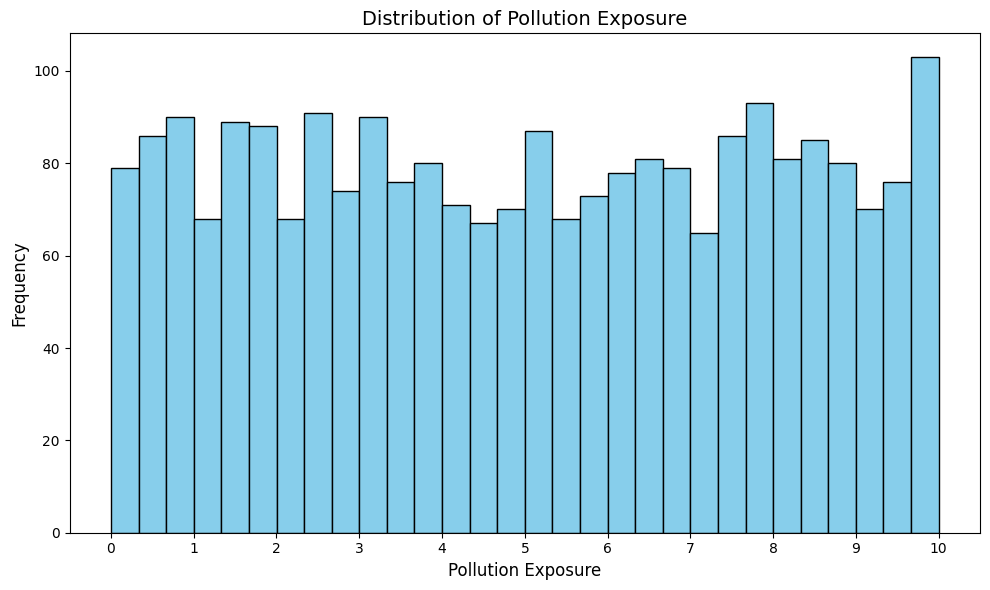

In [134]:
# Histogram for Pollution Exposure
plt.figure(figsize=(10, 6))
plt.hist(asthma_data['pollution_exposure'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Pollution Exposure', fontsize=14)
plt.xlabel('Pollution Exposure', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0, 11))
plt.tight_layout()
plt.show()


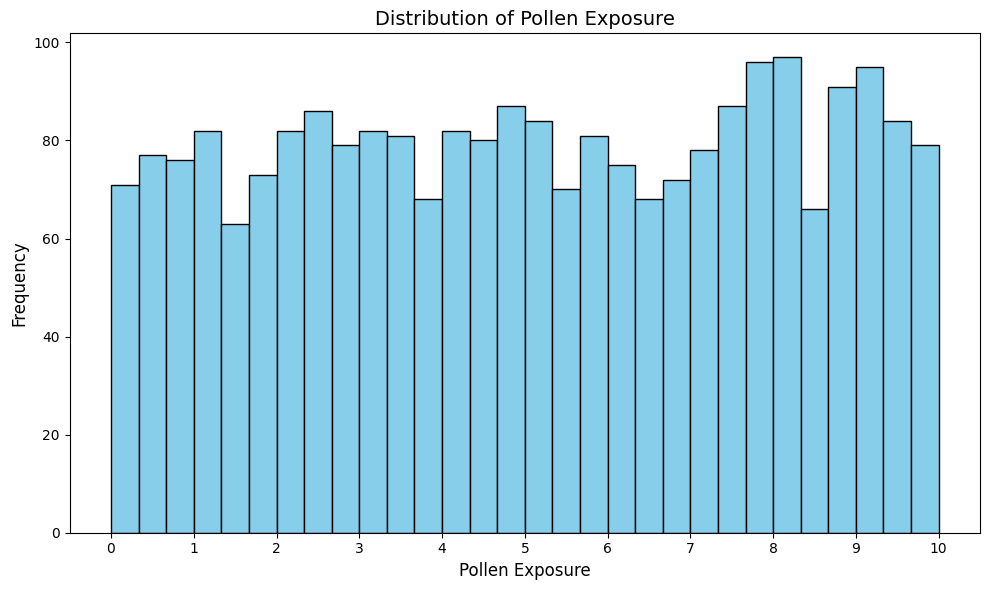

In [136]:
# Histogram for Pollen Exposure
plt.figure(figsize=(10, 6))
plt.hist(asthma_data['pollen_exposure'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Pollen Exposure', fontsize=14)
plt.xlabel('Pollen Exposure', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0, 11))
plt.tight_layout()
plt.show()



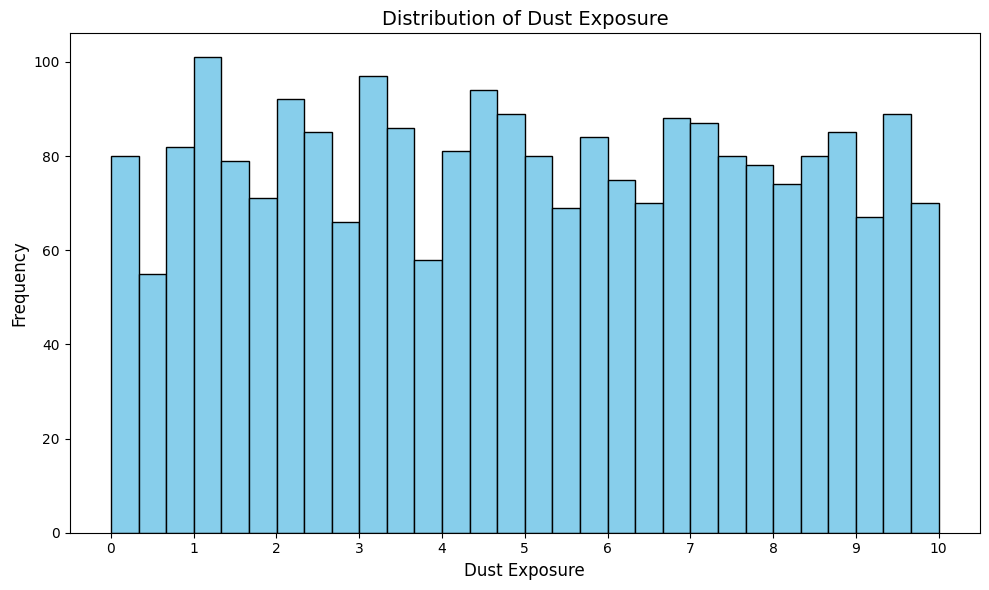

In [137]:
# Histogram for Dust Exposure
plt.figure(figsize=(10, 6))
plt.hist(asthma_data['dust_exposure'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Dust Exposure', fontsize=14)
plt.xlabel('Dust Exposure', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0, 11))
plt.tight_layout()
plt.show()

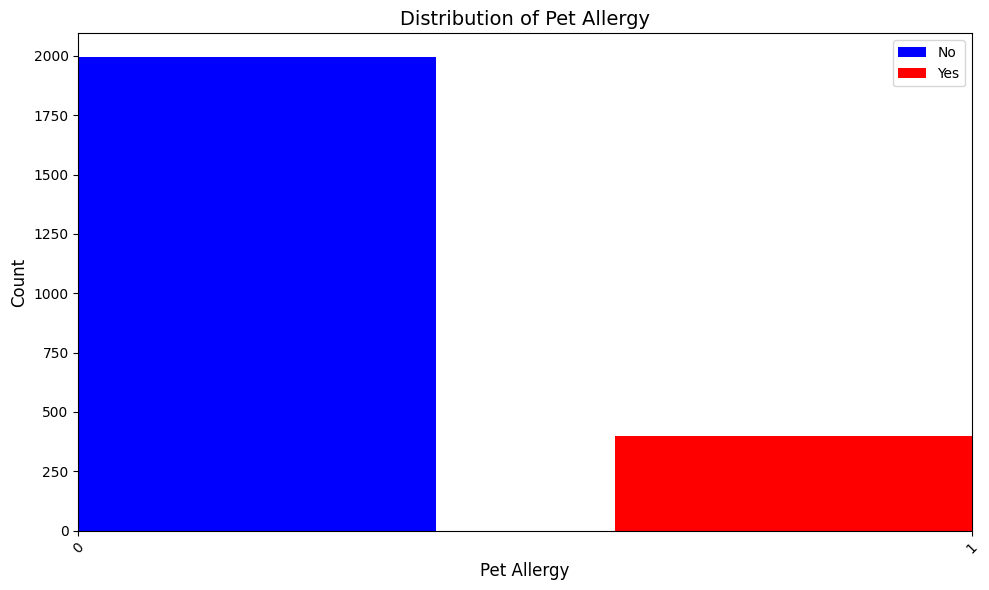

In [140]:
# Histogram for Pet Allergy
plt.figure(figsize=(10, 6))
plt.bar(asthma_data['pet_allergy'].value_counts().index, asthma_data['pet_allergy'].value_counts().values, color=['blue', 'red'], label = ['No', 'Yes'])
plt.title('Distribution of Pet Allergy', fontsize=14)
plt.xlabel('Pet Allergy', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 2), rotation=45)
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


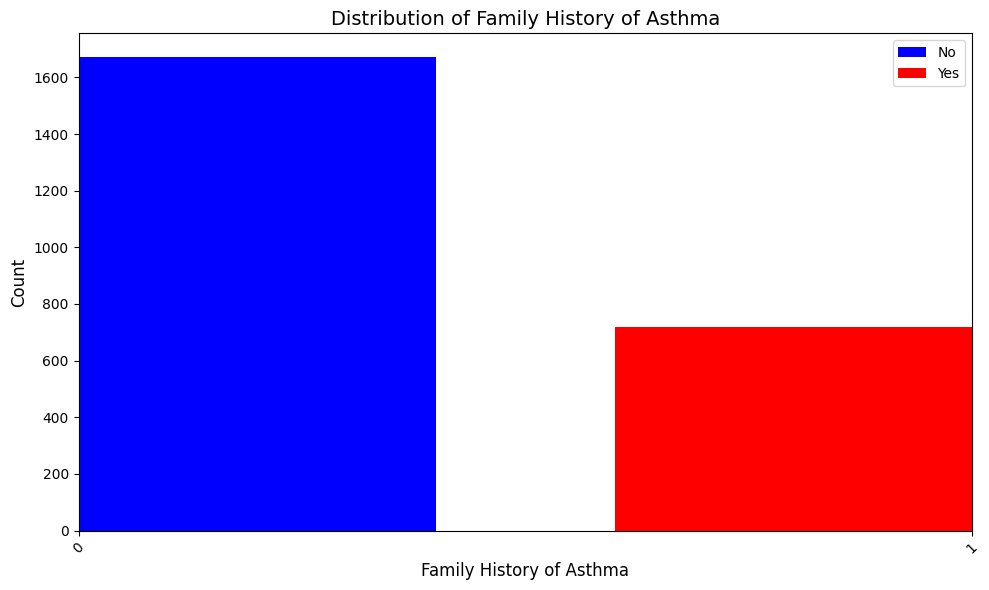

In [141]:
# Histogram for Family History of Asthma
plt.figure(figsize=(10, 6))
plt.bar(asthma_data['family_history_asthma'].value_counts().index, asthma_data['family_history_asthma'].value_counts().values, color=['blue', 'red'], label = ['No', 'Yes'])
plt.title('Distribution of Family History of Asthma', fontsize=14)
plt.xlabel('Family History of Asthma', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 2), rotation=45)
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


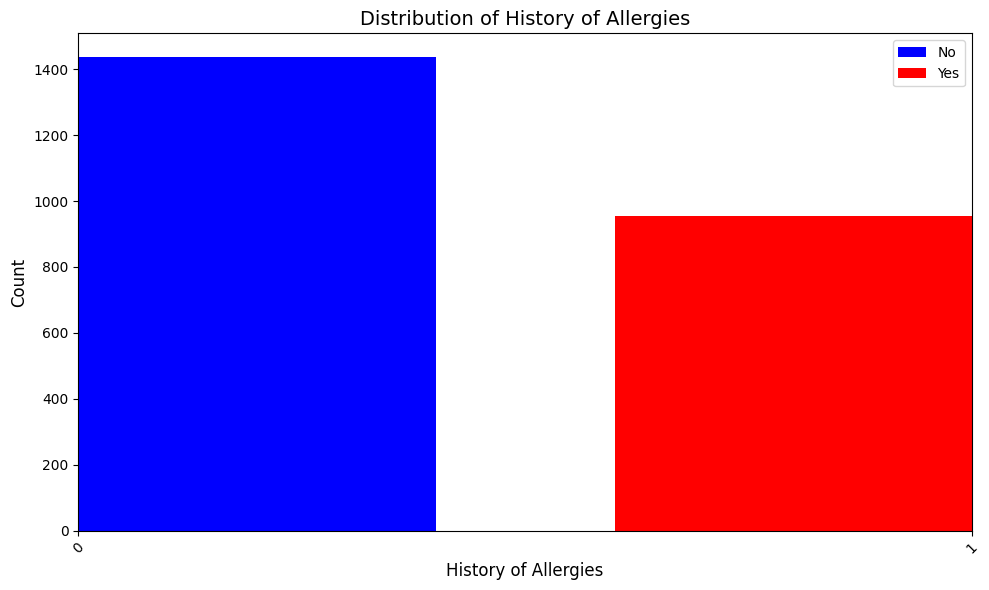

In [142]:
# Histogram for History of Allergies
plt.figure(figsize=(10, 6))
plt.bar(asthma_data['history_of_allergies'].value_counts().index, asthma_data['history_of_allergies'].value_counts().values, color=['blue', 'red'], label = ['No', 'Yes'])
plt.title('Distribution of History of Allergies', fontsize=14)
plt.xlabel('History of Allergies', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 2), rotation=45)
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


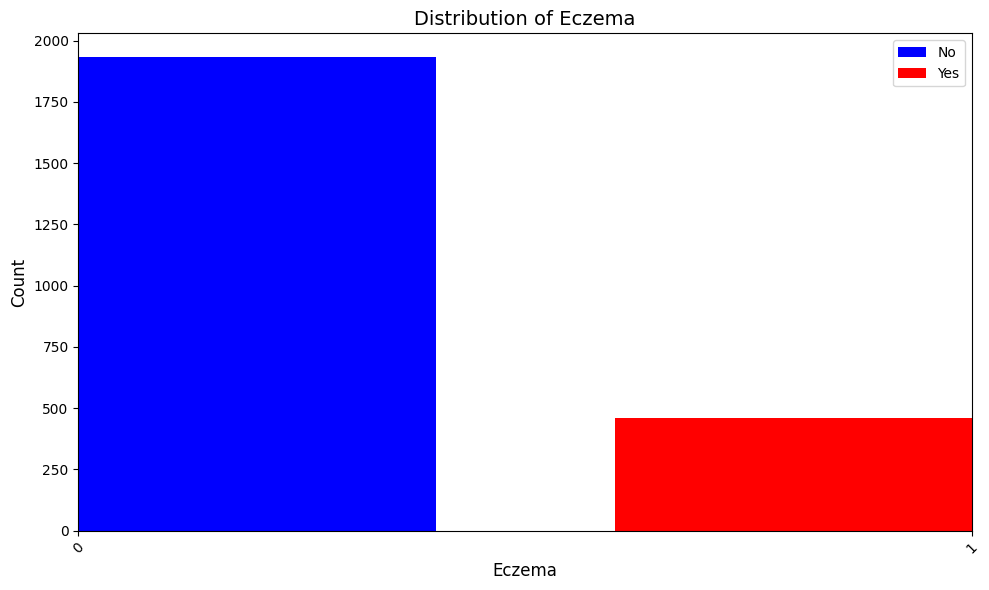

In [143]:
# Histogram for Eczema
plt.figure(figsize=(10, 6))
plt.bar(asthma_data['eczema'].value_counts().index, asthma_data['eczema'].value_counts().values, color=['blue', 'red'], label = ['No', 'Yes'])
plt.title('Distribution of Eczema', fontsize=14)
plt.xlabel('Eczema', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 2), rotation=45)
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


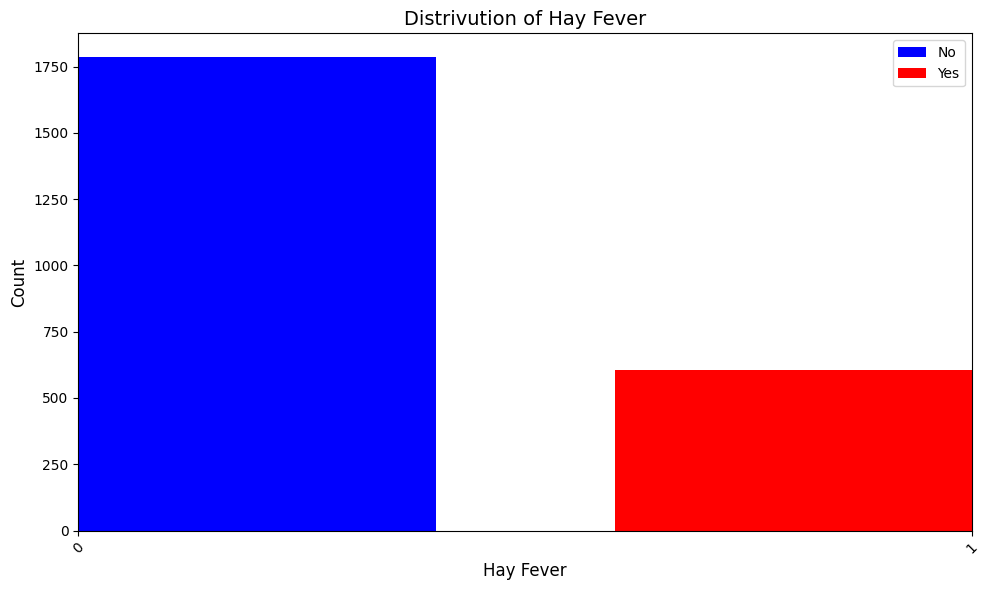

In [144]:
# Histogram for Hay Fever
plt.figure(figsize=(10, 6))
plt.bar(asthma_data['hay_fever'].value_counts().index, asthma_data['hay_fever'].value_counts().values, color=['blue', 'red'], label = ['No', 'Yes'])
plt.title('Distrivution of Hay Fever', fontsize=14)
plt.xlabel('Hay Fever', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 2), rotation=45)
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


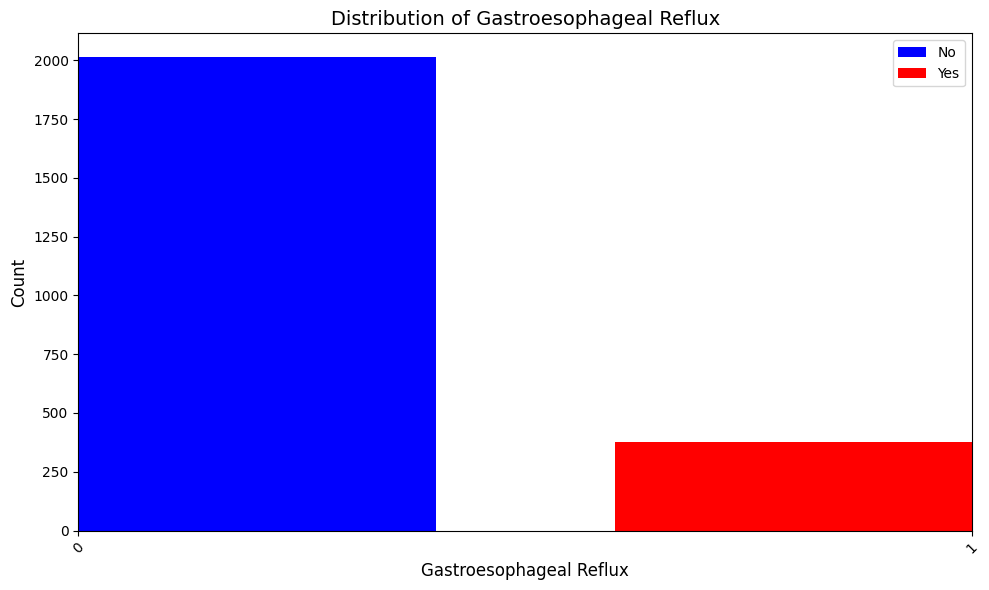

In [149]:
plt.figure(figsize=(10, 6))
plt.bar(asthma_data['gastroesophageal_reflux'].value_counts().index, asthma_data['gastroesophageal_reflux'].value_counts().values, color=['blue', 'red'], label = ['No', 'Yes'])
plt.title('Distribution of Gastroesophageal Reflux', fontsize=14)
plt.xlabel('Gastroesophageal Reflux', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 2), rotation=45)
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

In [146]:
asthma_data.doctor_in_charge.value_counts()

,count
doctor_in_charge,
Dr_Confid,2392


In [147]:
asthma_data.drop(columns = ['doctor_in_charge'], inplace = True)

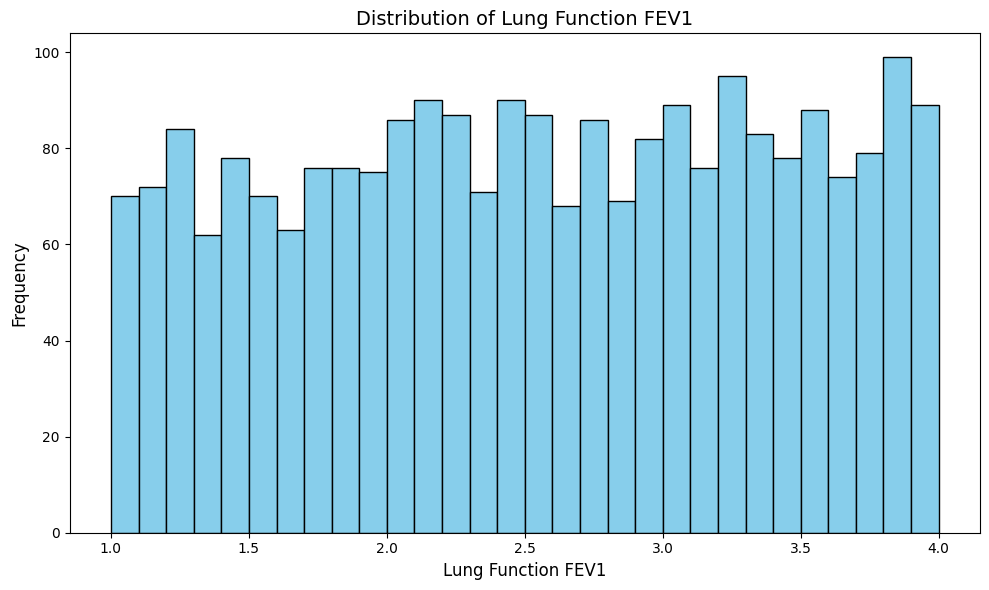

In [150]:
plt.figure(figsize=(10, 6))
plt.hist(asthma_data['lung_function_fev1'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Lung Function FEV1', fontsize=14)
plt.xlabel('Lung Function FEV1', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


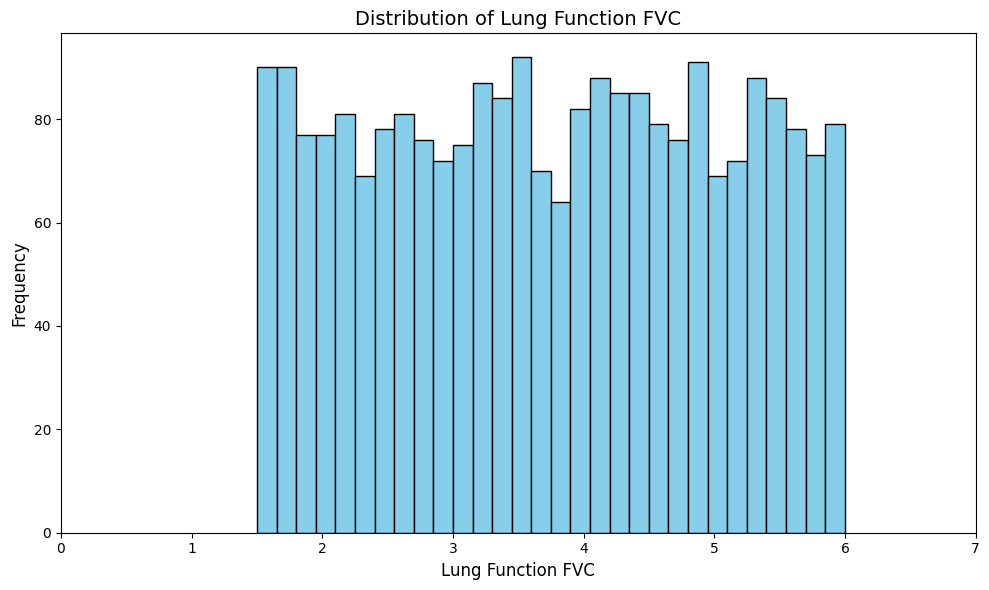

In [153]:
plt.figure(figsize=(10, 6))
plt.hist(asthma_data['lung_function_fvc'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Lung Function FVC', fontsize=14)
plt.xlabel('Lung Function FVC', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0, 8))
plt.tight_layout()
plt.show()

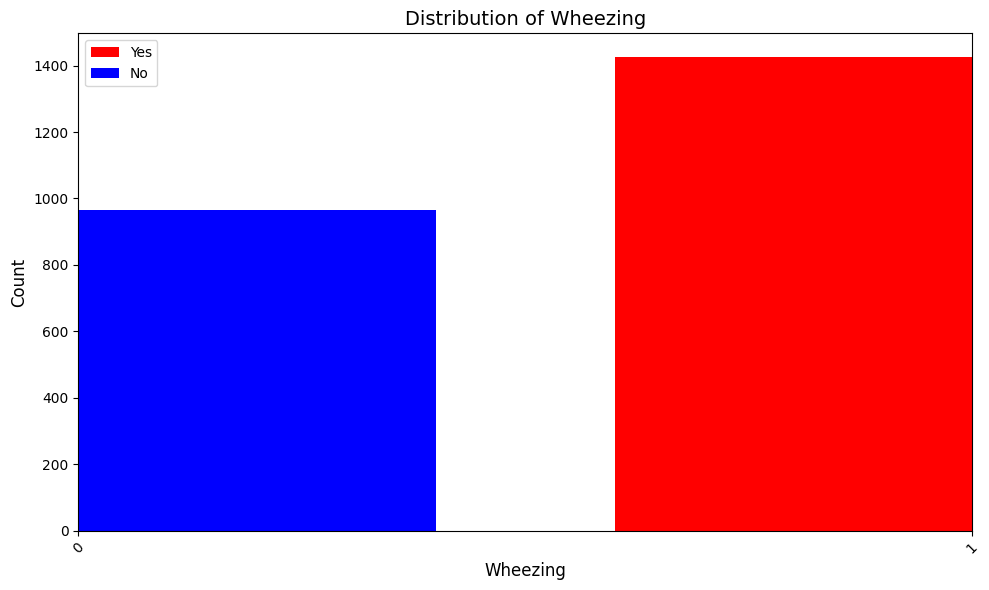

In [159]:
plt.figure(figsize=(10, 6))
plt.bar(asthma_data['wheezing'].value_counts().index, asthma_data['wheezing'].value_counts().values, color=['red', 'blue'], label = ['Yes', 'No'])
plt.title('Distribution of Wheezing', fontsize=14)
plt.xlabel('Wheezing', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 2), rotation=45)
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

In [161]:
asthma_data.shortness_of_breath.value_counts()

,count
shortness_of_breath,
1,1197
0,1195


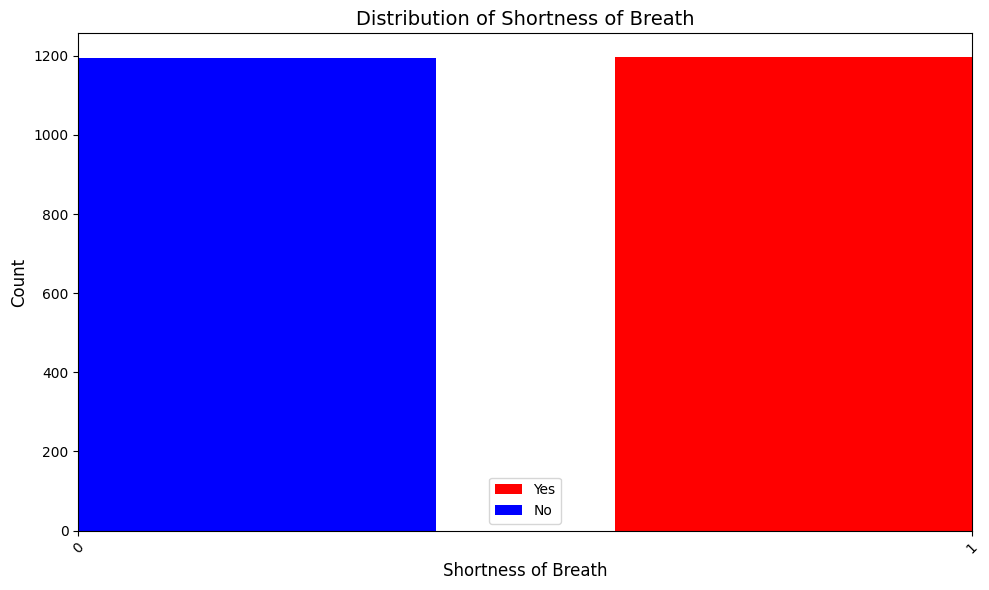

In [163]:
plt.figure(figsize=(10, 6))
plt.bar(asthma_data['shortness_of_breath'].value_counts().index, asthma_data['shortness_of_breath'].value_counts().values, color=['red', 'blue'], label = ['Yes', 'No'])
plt.title('Distribution of Shortness of Breath', fontsize=14)
plt.xlabel('Shortness of Breath', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 2), rotation=45)
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

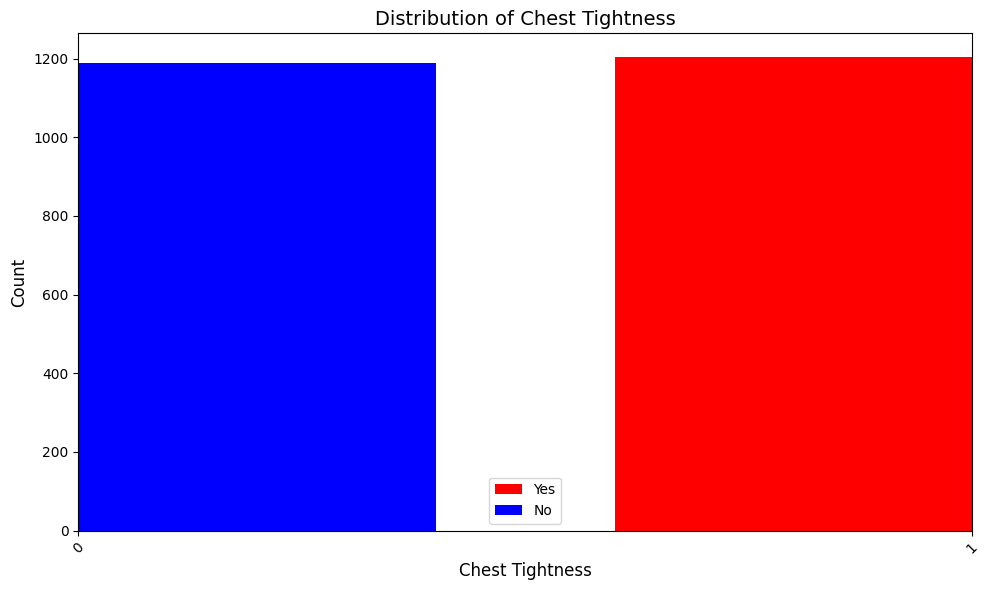

In [165]:
plt.figure(figsize=(10, 6))
plt.bar(asthma_data['chest_tightness'].value_counts().index, asthma_data['chest_tightness'].value_counts().values, color=['red', 'blue'], label = ['Yes', 'No'])
plt.title('Distribution of Chest Tightness', fontsize=14)
plt.xlabel('Chest Tightness', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 2), rotation=45)
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

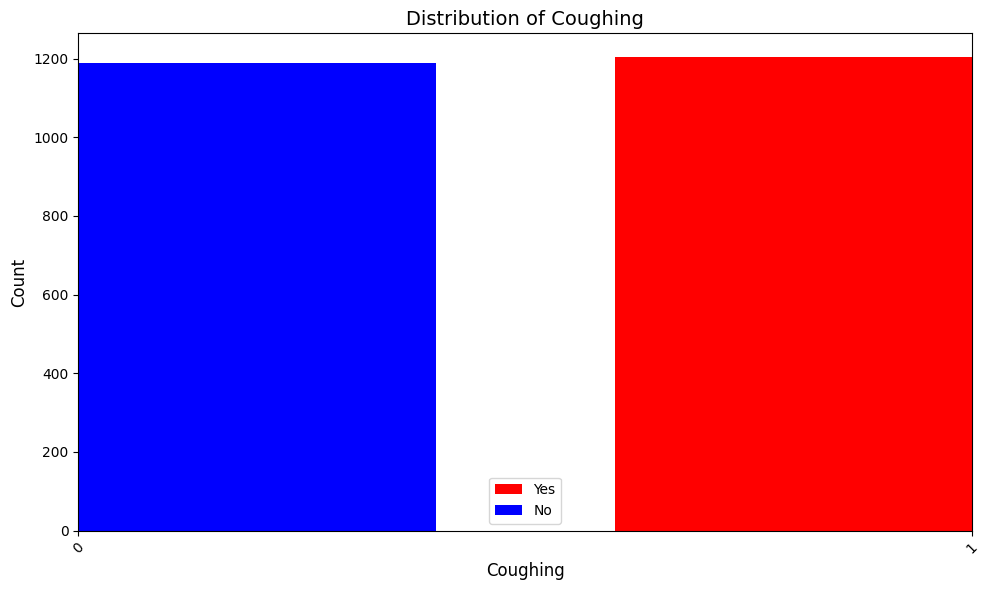

In [167]:
plt.figure(figsize=(10, 6))
plt.bar(asthma_data['coughing'].value_counts().index, asthma_data['coughing'].value_counts().values, color=['red', 'blue'], label = ['Yes', 'No'])
plt.title('Distribution of Coughing', fontsize=14)
plt.xlabel('Coughing', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 2), rotation=45)
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

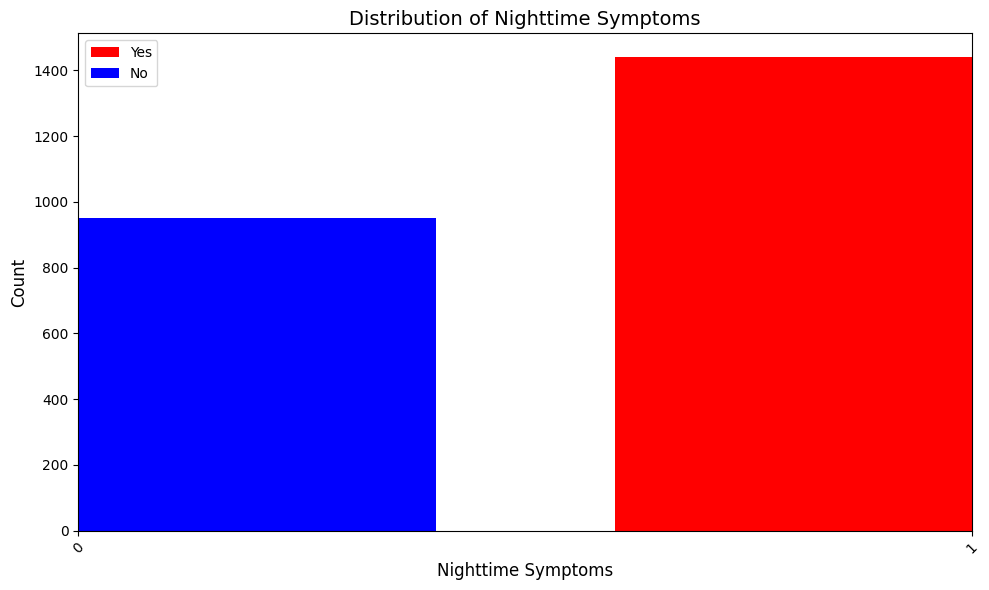

In [170]:
plt.figure(figsize=(10, 6))
plt.bar(asthma_data['nighttime_symptoms'].value_counts().index, asthma_data['nighttime_symptoms'].value_counts().values, color=['red', 'blue'], label = ['Yes', 'No'])
plt.title('Distribution of Nighttime Symptoms', fontsize=14)
plt.xlabel('Nighttime Symptoms', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 2), rotation=45)
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

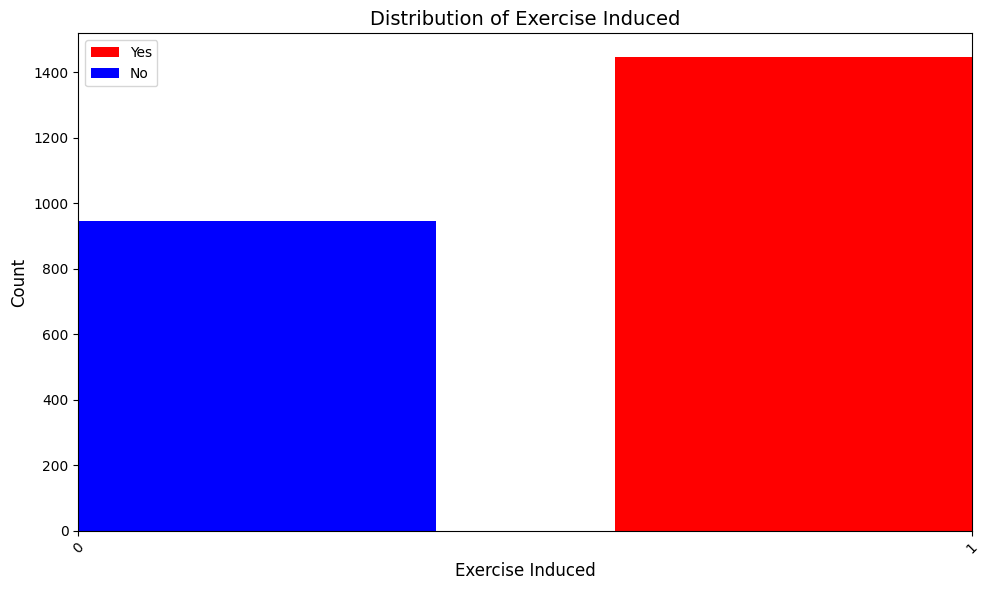

In [171]:
plt.figure(figsize=(10, 6))
plt.bar(asthma_data['exercise_induced'].value_counts().index, asthma_data['exercise_induced'].value_counts().values, color=['red', 'blue'], label = ['Yes', 'No'])
plt.title('Distribution of Exercise Induced', fontsize=14)
plt.xlabel('Exercise Induced', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 2), rotation=45)
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

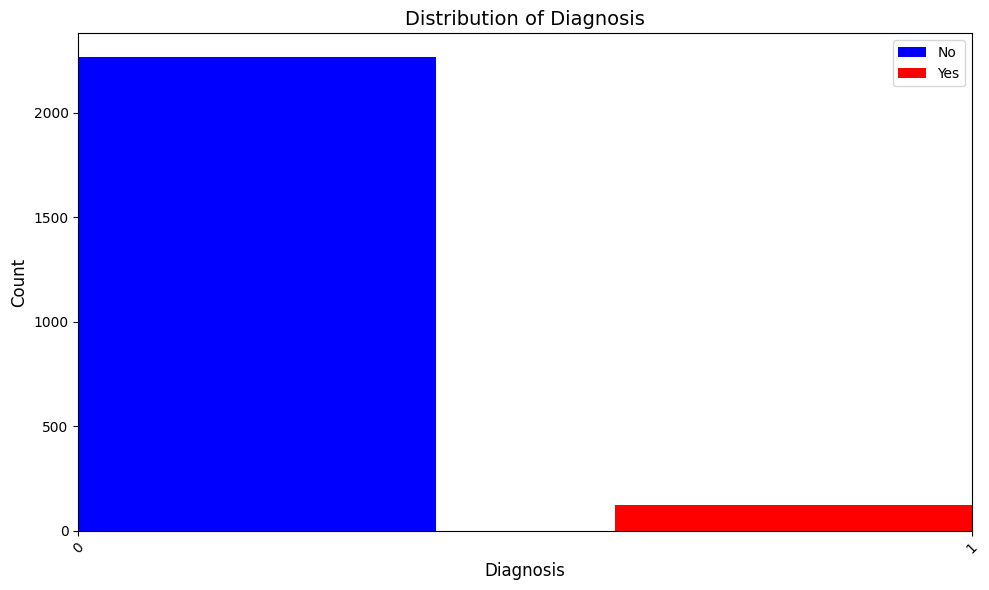

In [169]:
# Distribution of Diagnosis
plt.figure(figsize=(10, 6))
plt.bar(asthma_data['diagnosis'].value_counts().index, asthma_data['diagnosis'].value_counts().values, color=['blue', 'red'], label = ['No', 'Yes'])
plt.title('Distribution of Diagnosis', fontsize=14)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 2), rotation=45)
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

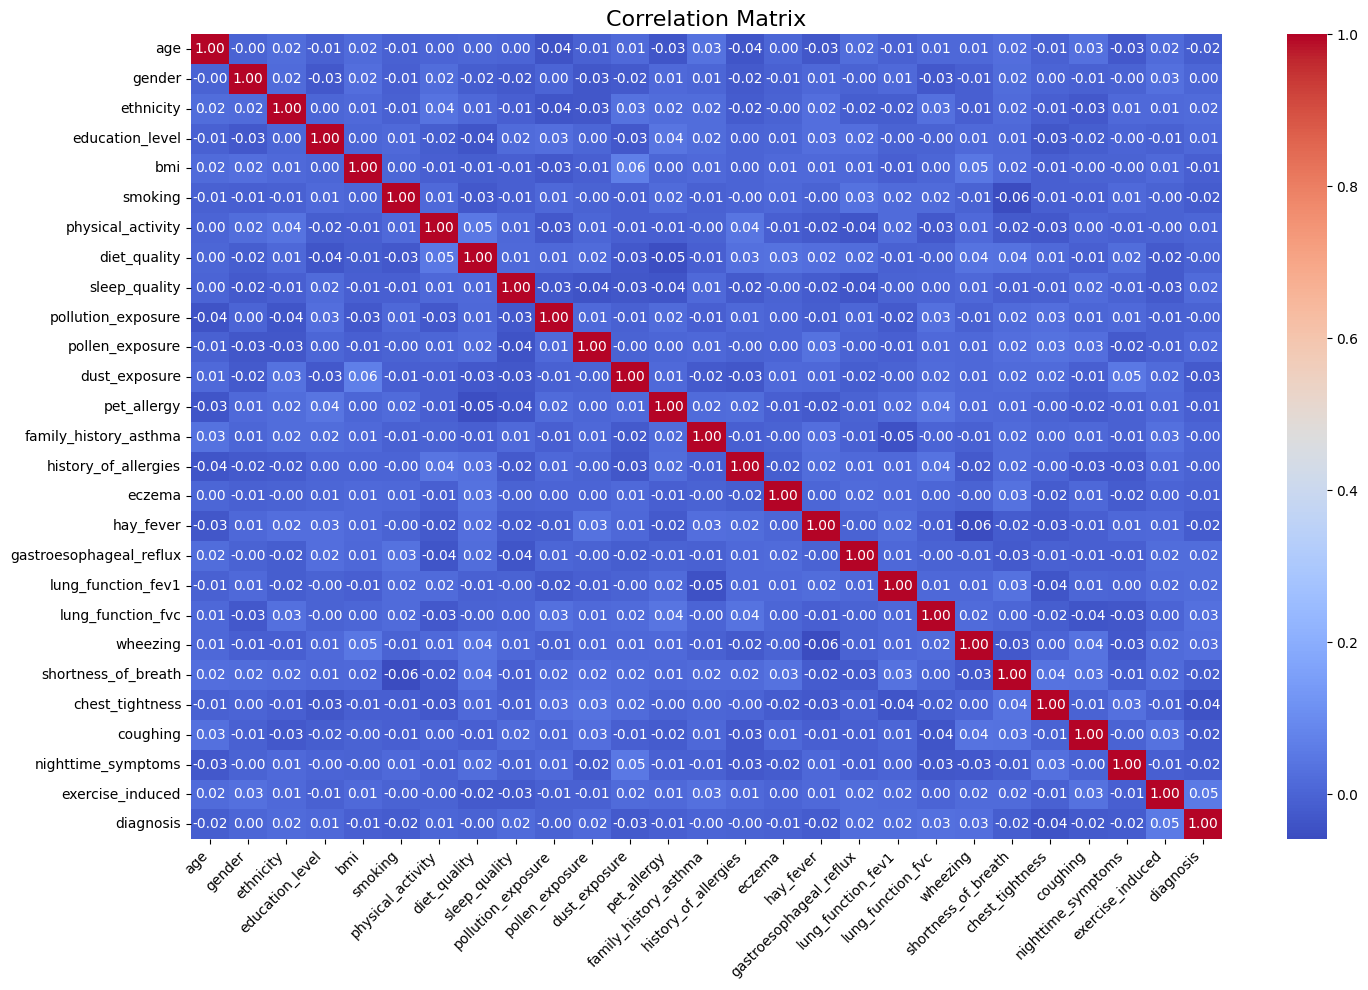

In [178]:
# prompt: create a correlation matrix for all columns without the first

import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = asthma_data.iloc[:, 1:].corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
